# TF-IDF and DBSCAN

### Applied to the titles of 12,000 Etsy listings

### Note: is 13 clusters too crazy? The graph does not show clear clusters. Test on one of the other sets of data to see if its reasonable?

In [2]:
# import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [3]:
# import libraries for algorithm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [4]:
# import the dataset
df = pd.read_csv('data/titles-cleaned041022.csv')

In [5]:
# remove the punctuation
df['title_string'] = df['title_listing'].apply(lambda x: re.sub("[^A-Za-z]+", " ", x))

In [6]:
# change the dataframe column to a series to use with the model
title = df['title_string']

TD-IDF Vectorization

In [8]:
# initialize the vectorizer
vector = TfidfVectorizer(sublinear_tf=True, min_df=0.005, max_df=0.4)

In [9]:
# Apply vectorizer and save array of vectors in V
V = vector.fit_transform(title)

In [10]:
V.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Apply DBSCAN

In [20]:
# define a function that will find the top words for each cluster
def top_words(n):
    words_df = pd.DataFrame(V.todense()).groupby(clusters).mean()
    words = vector.get_feature_names()
    for i,r in words_df.iterrows():
        print('\nCluster {}'.format(i))
        print(', '.join([words[w] for w in np.argsort(r)[::-1][:n]]))

In [7]:
# types of distance measures that work with DBSCAN
sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute'])

['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'precomputed']

In [168]:
# intialize dbscan
db = DBSCAN(eps=2.5, min_samples=5, metric = "l1")

In [169]:
# fit the model to the vectors
db.fit(V)

DBSCAN(eps=2.5, metric='l1')

In [170]:
# store cluster labels in a variable
clusters = db.labels_

#look at the cluster labels
[c for c in clusters][:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [171]:
# add clusters to the dataframe
df['cluster'] = clusters.tolist()

Dimension Reduction and Visualization

In [172]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)

# pass the vectors to the pca and store the vectors
vectorsPCA = pca.fit_transform(V.toarray())

In [173]:
# save the two dimensions
xD = vectorsPCA[:, 0]
yD = vectorsPCA[:, 1]

In [174]:
# add vectors and clusters to the dataframe
df['cluster'] = clusters
df['xD'] = xD
df['yD'] = yD

In [175]:
top_words(10)


Cluster -1
bowl, gift, decor, modern, white, farmhouse, blue, vintage, rustic, plate

Cluster 0
mug, bowl, coffee, cup, vase, blue, tea, white, set, green

Cluster 1
saucer, teacup, lovers, christmas, large, style, tea, polka, dot, gift

Cluster 2
drinkware, cups, christmas, gold, tableware, mugs, set, decor, idea, gift

Cluster 3
wall, handcrafted, platter, tableware, custom, porcelain, dinner, plate, carved, ceramics

Cluster 4
craft, pattern, studio, flower, vintage, dish, tall, lidded, bowl, small

Cluster 5
handthrown, wedding, style, modern, rustic, unique, gift, flowers, utensil, home

Cluster 6
food, safe, candle, decorative, home, decor, holder, dish, bowl, fruit

Cluster 7
personalized, cute, mug, round, gifts, handle, coffee, cups, painted, small


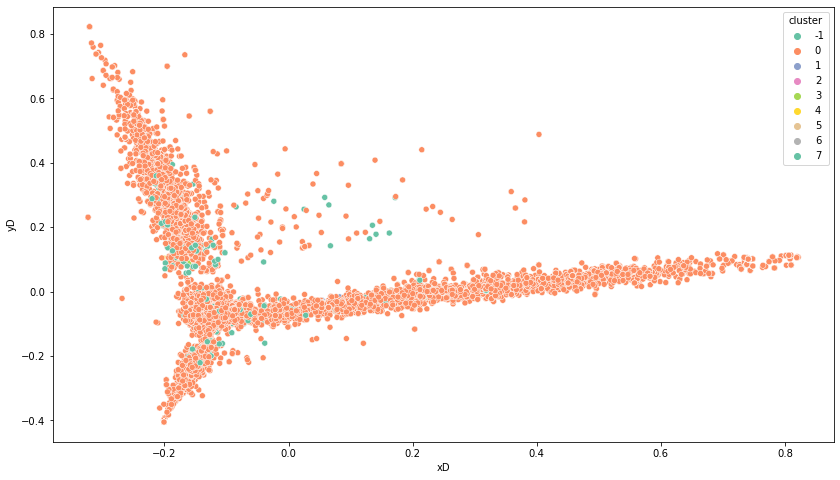

In [176]:
# plot the clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="xD", y="yD", hue='cluster', palette="Set2")
plt.show()

In [50]:
# Use top words to assign categories to the clusters
#categories = {0:'Mug', 1:'Plate', 2:'Small Mug/Cup', 3:'Jewelry', 4:'Multiple Pieces', 5:'Vase', 6:'Bowl', 7:'Small Dish'}

## Ask for help with this one:

In [23]:
for i in range (0, len(df)):
    df['category'][i] = categories[df['cluster'][i]]

KeyError: 'category'